In [27]:
from notebooks.wandb_ds import *
import numpy as np

pdpct_ds = Dataset.load("pd_pop_wseeds_experiment")

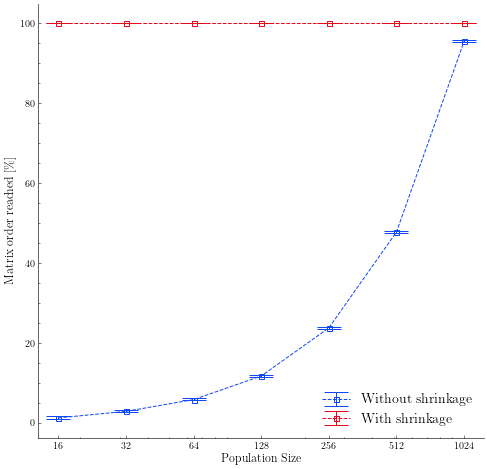

In [95]:
agg = pdpct_ds.aggregate(["BasePopulationSize", "UseShrinkage"], ["pdpct"], val=False)

shrinkages = np.sort(agg.UseShrinkage.unique())
pop_sizes = np.sort(agg.BasePopulationSize.unique().astype(int))

plt.figure(figsize=(8,8))

for shrinkage in shrinkages:
    result_median = []
    result_error = []
    for pop_size in pop_sizes:
        pdpcts = agg.loc[(agg.BasePopulationSize == str(pop_size)) & (agg.UseShrinkage == shrinkage)].pdpct
        result_median.append(np.median(pdpcts))
        if pop_size == 32 and shrinkage == "True":
            result_error.append([0, 0])
            continue
        result_error.append([np.median(pdpcts) - np.min(pdpcts), np.max(pdpcts) - np.median(pdpcts)])
    result_error = np.transpose(result_error)
    label = "With shrinkage" if shrinkage == "True" else "Without shrinkage"
    plt.errorbar(pop_sizes, result_median, result_error, fmt='--s', markerfacecolor='none', markersize=5, capsize=12, label=label)

plt.xscale("log")
plt.xticks(pop_sizes, pop_sizes)
plt.legend(prop={'size': 14})
plt.xlabel("Population Size", fontsize=12)
plt.ylabel("Matrix order reached [\%]", fontsize=12)

plt.savefig(IMG_DIR / "pdpct_order_reached.pdf")

In [84]:
bool("false")

True